<div style="display: flex; background-color: #3F579F;">
    <h1 style="margin: auto; padding: 30px 30px 0px 30px;">Design an application for public health - Project 3</h1>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 5px 30px 0px 30px;">
    <span style="width: 100%; text-align: center; font-size:20px; font-weight: bold; float: left;">| Analysis notebook |</span>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 10px 30px 30px 30px;">
    <span style="width: 100%; text-align: center; font-size:26px; float: left;">Data Scientist course - OpenClassrooms</span>
</div>

<div class="alert alert-block alert-info">
    This <b>notebook</b> is optimized to <b>be used</b> with:
    <ul style="list-style-type: square;">
    <li>JupyterLab 3.0.14</li>
    <li>JupyterLab Theme: JupyterLab Dark</li>
    <li>Extension: @jupyter-widgets/jupyterlab-manager</li>
</ul>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and functions</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries and functions</h3>
</div>

In [37]:
import os
import io
import gc
from math import prod
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

%matplotlib inline
sns.set_theme(style="darkgrid")

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.2. Functions declaration</h3>
</div>

In [38]:
def df_analysis(df, name_df, columns, *args, **kwargs):
    """
    Method used for analyzing on the DataFrame.

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to analyze
        name_df (str): Dataset name
        columns (list): Dataframe keys in list format
        
        *args, **kwargs:
        -----------------
            flag (str): Flag to show complete information about the dataset to analyse
                        "complete" shows all information about the dataset

    Returns:
    -----------------
        None. 
        Print the analysis on the Dataset. 
    """
    
    # Getting the variables
    flag = kwargs.get("flag", None)
    
    ORDERING_COMPLETE = [
        "name", "type", "records", "unique", "# NaN", "% NaN", "mean", "min", "25%", "50%", "75%", "max", "std"
    ]
    
    # Calculating the memory usage based on dataframe.info()
    buf = io.StringIO()
    df.info(buf=buf)
    memory_usage = buf.getvalue().split('\n')[-2]
    
    if df.empty:
        print("The", name_df, "dataset is empty. Please verify the file.")
    else:
        empty_cols = [col for col in df.columns if df[col].isna().all()] # identifying empty columns
        df_rows_duplicates = df[df.duplicated()] #identifying full duplicates rows
        
        # Creating a dataset based on Type object and records by columns
        type_cols = df.dtypes.apply(lambda x: x.name).to_dict() 
        df_resume = pd.DataFrame(list(type_cols.items()), columns = ["name", "type"])
        df_resume["records"] = list(df.count())
        df_resume["# NaN"] = list(df.isnull().sum())
        df_resume["% NaN"] = list(((df.isnull().sum() / len(df.index))*100).round(2))
        
        print("\nAnalysis of", name_df, "dataset")
        print("--------------------------------------------------------------------")
        print("- Dataset shape:                 ", df.shape[0], "rows and", df.shape[1], "columns")
        print("- Total of NaN values:           ", df.isna().sum().sum())
        print("- Percentage of NaN:             ", round((df.isna().sum().sum() / prod(df.shape)) * 100, 2), "%")
        print("- Total of full duplicates rows: ", df_rows_duplicates.shape[0])
        print("- Total of empty rows:           ", df.shape[0] - df.dropna(axis="rows", how="all").shape[0]) if df.dropna(axis="rows", how="all").shape[0] < df.shape[0] else \
                    print("- Total of empty rows:            0")
        print("- Total of empty columns:        ", len(empty_cols))
        print("  + The empty column is:         ", empty_cols) if len(empty_cols) == 1 else \
                    print("  + The empty column are:         ", empty_cols) if len(empty_cols) >= 1 else None
        print("- Unique indexes:                ", df.index.is_unique)
        
        print("\n- The key(s):", columns, "is not present multiple times in the dataframe.\n  It CAN be used as a primary key.") if df.size == df.drop_duplicates(columns).size else \
            print("\n- The key(s):", columns, "is present multiple times in the dataframe.\n  It CANNOT be used as a primary key.")
        
        pd.set_option("display.max_rows", None) # show full of showing rows
        pd.set_option("display.max_columns", None) # show full of showing cols
        pd.set_option("max_colwidth", None) # show full width of showing cols
        
        if flag is None or flag != "complete":
            print("\n- Type object and records by columns   (",memory_usage,")")
            print("--------------------------------------------------------------------")
        elif flag == "complete":
            df_resume["unique"] = list(df.nunique())
            df_desc = pd.DataFrame(df.describe().T).reset_index()
            df_desc = df_desc.rename(columns={"index": "name"})
            df_resume = df_resume.merge(right=df_desc[["name", "mean", "min", "25%", "50%", "75%", "max", "std"]], on="name", how="left")
            df_resume = df_resume[ORDERING_COMPLETE]
            print("\n- Type object and records by columns                                                                   (",memory_usage,")")
            print("---------------------------------------------------------------------------------------------------------------------------------")
        
        display(df_resume.sort_values("records", ascending=False))
        
        pd.reset_option("display.max_rows") # reset max of showing rows
        pd.reset_option("display.max_columns") # reset max of showing cols
        pd.reset_option("display.max_colwidth") # reset width of showing cols
        
        # deleting dataframe to free memory
        if flag == "complete":
            del [[df_resume, df_desc]]
            gc.collect()
            df_resume, df_desc = (pd.DataFrame() for i in range(2))
        else:
            del df_resume
            gc.collect()
            df_resume = pd.DataFrame()

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files</h2>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.1. Importing and preparing files</h3>
</div>

In [39]:
data = pd.read_csv("datasets\dataset_cleaned.csv")

In [40]:
data.head(5)

,code,last_modified_datetime,product_name,main_category,categories,renamed_category,image_url,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g
0,0000000005166,2019-02-12 18:38:12,cuisse de poulet direct au four curry,en:chicken-thighs,"Viandes, Volailles, Poulets, Cuisses de poulet",Meats,https://static.openfoodfacts.org/images/produc...,197.0,13.0,4.0,0.9,17.0,1.10
1,0000069163036,2019-02-12 18:38:13,Cuisses de poulet,en:chicken-thighs,"Viandes, Volailles, Poulets, Cuisses de poulet",Meats,https://static.openfoodfacts.org/images/produc...,206.0,15.0,4.2,1.7,16.0,1.10
2,0000130008136,2019-01-04 20:45:08,Escalope de dinde,en:turkey-cutlets,"Viandes, Volailles, Dindes, Escalopes de dinde",Meats,NaN,151.0,5.8,1.4,0.1,24.0,1.40
3,00003001,2020-10-28 15:20:28,Filet de poulet extra tendre thym citron,en:chicken-breasts,"Viandes, Volailles, Poulets, Filets de poulet",Meats,https://static.openfoodfacts.org/images/produc...,108.0,1.6,0.0,0.7,22.0,1.30
4,650403,2020-05-04 15:38:15,2 roast chicken legs,en:chicken-thighs,"Viandes, Volailles, Poulets, Cuisses de poulet",Meats,https://static.openfoodfacts.org/images/produc...,219.0,13.4,3.4,0.3,24.4,0.58


In [41]:
df_analysis(data, "data", "code", flag="complete")


Analysis of data dataset
--------------------------------------------------------------------
- Dataset shape:                  17328 rows and 13 columns
- Total of NaN values:            825
- Percentage of NaN:              0.37 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- The key(s): code is not present multiple times in the dataframe.
  It CAN be used as a primary key.

- Type object and records by columns                                                                   ( memory usage: 1.7+ MB )
---------------------------------------------------------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,code,object,17328,17328,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,last_modified_datetime,object,17328,12651,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,main_category,object,17328,10,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,categories,object,17328,10,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,renamed_category,object,17328,7,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,energy-kcal_100g,float64,17328,1187,0,0.00,332.734417,0.0,124.00,198.00,498.00,933.0,258.596521
8,fat_100g,float64,17328,993,0,0.00,25.272420,0.0,4.88,12.00,35.00,100.0,29.471284
9,saturated-fat_100g,float64,17328,878,0,0.00,8.891009,0.0,1.30,3.00,16.00,35.0,9.422306
10,sugars_100g,float64,17328,848,0,0.00,6.464192,0.0,0.00,0.48,2.61,55.0,12.335634
11,proteins_100g,float64,17328,671,0,0.00,15.596766,0.0,6.40,20.00,24.00,37.0,9.634526


<div class="alert alert-block alert-danger">
    <b>Flag position</b>
</div>

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">3. Statistic analysis</h2>
</div>

In [104]:
VARIABLES = ["energy-kcal_100g", "proteins_100g", "fat_100g", "sugars_100g"]

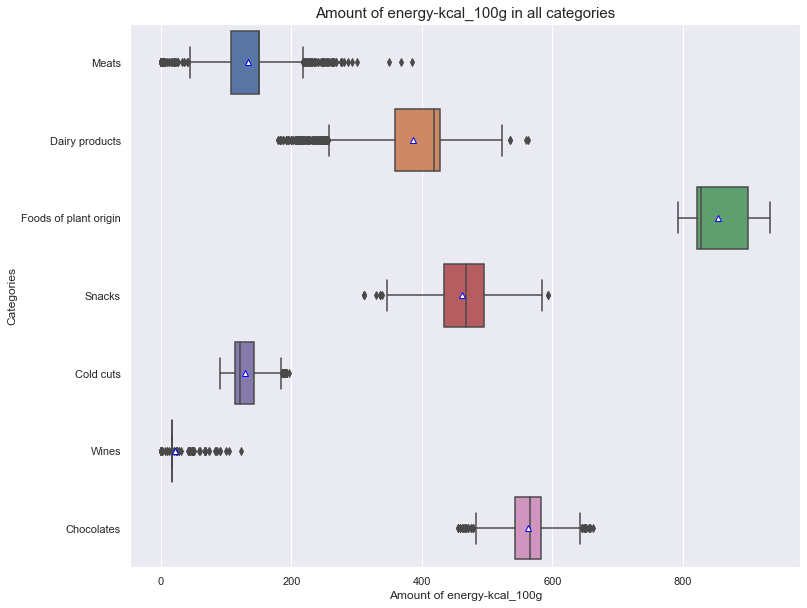

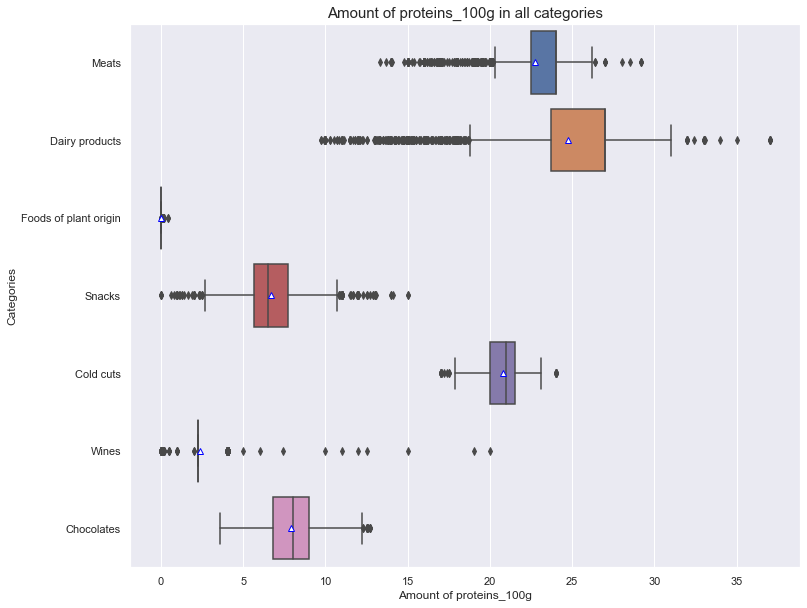

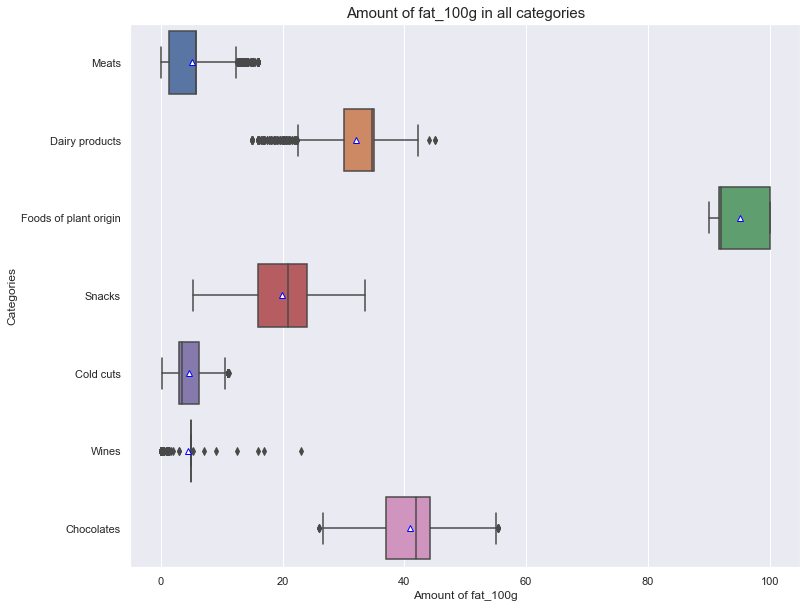

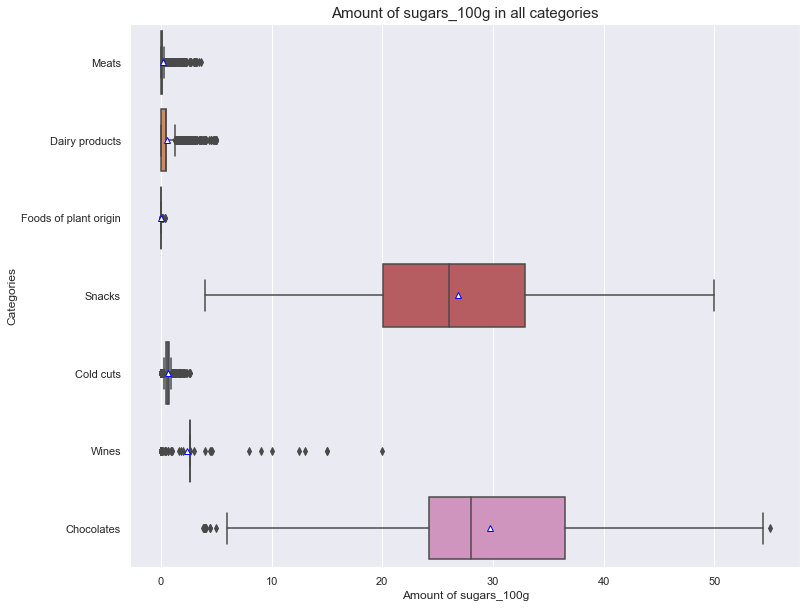

In [107]:
for var in VARIABLES:
    plt.figure(figsize=[12,10])
    sns.boxplot(x=data[var], y=data["renamed_category"], orient="h", showmeans=True, 
                meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
    plt.title("Amount of " + var + " in all categories", size=15)
    plt.ylabel("Categories", size=12)
    plt.xlabel("Amount of " + var, size=12)
    plt.show()

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.1. Select a subset of data</h3>
</div>

<div class="alert alert-block alert-info">
    To limit the analysis to be performed, we are going to work following the next premises
    <ul style="list-style-type: square;">
        <li>Select the category who has more records</li>
        <li>Select only 4 variables to work</li>
        <ul style="list-style-type: disc;">
            <li>energy-kcal_100g</li>
            <li>proteins_100g</li>
            <li>fat_100g</li>
            <li>sugars_100g</li>
        </ul>
    </ul>
</div>

In [42]:
data.groupby("renamed_category")["code"].count().sort_values(ascending=False)

renamed_category
Meats                    6141
Dairy products           2469
Foods of plant origin    2125
Snacks                   1936
Cold cuts                1934
Chocolates               1811
Wines                     912
Name: code, dtype: int64

In [112]:
df_subset = data[data["renamed_category"] == "Snacks"].copy()

In [113]:
df_subset.shape

(1936, 13)

In [114]:
VARIABLES = ["energy-kcal_100g", "proteins_100g", "fat_100g", "sugars_100g"]

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.1. Select a subset of data</h3>
</div>

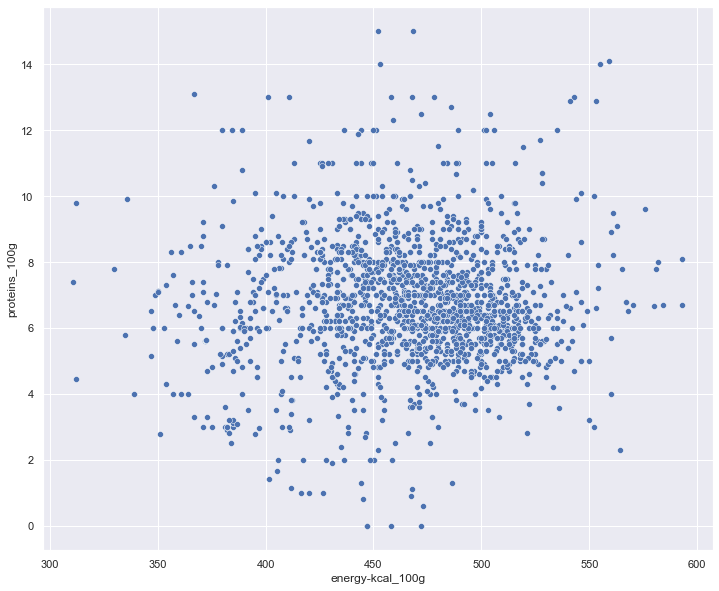

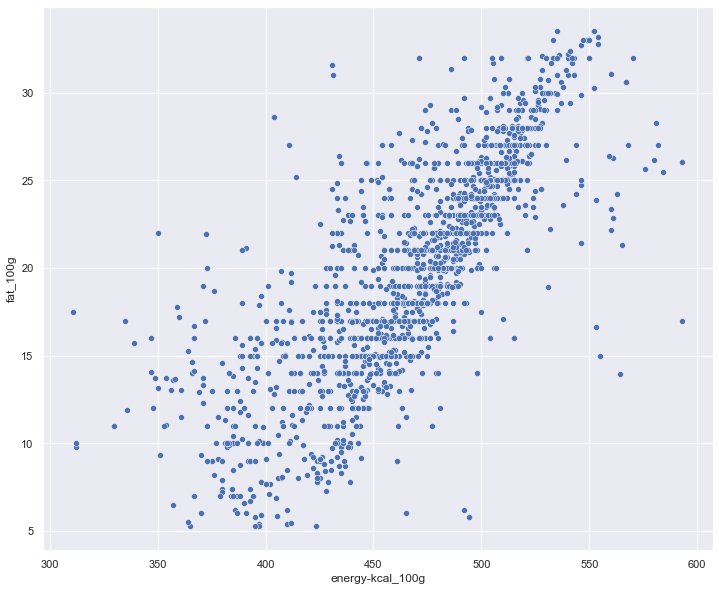

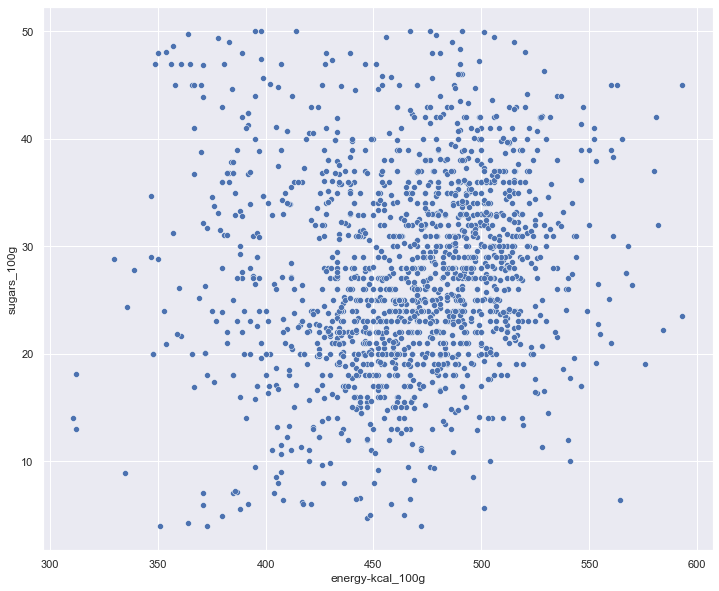

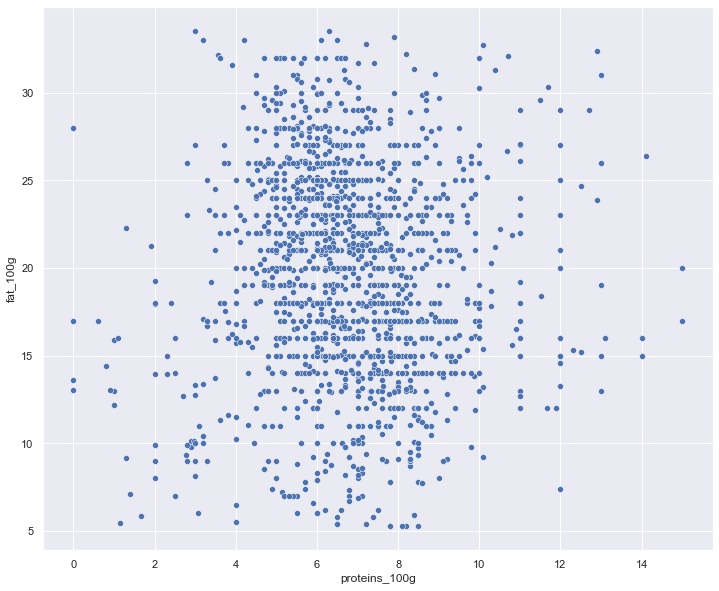

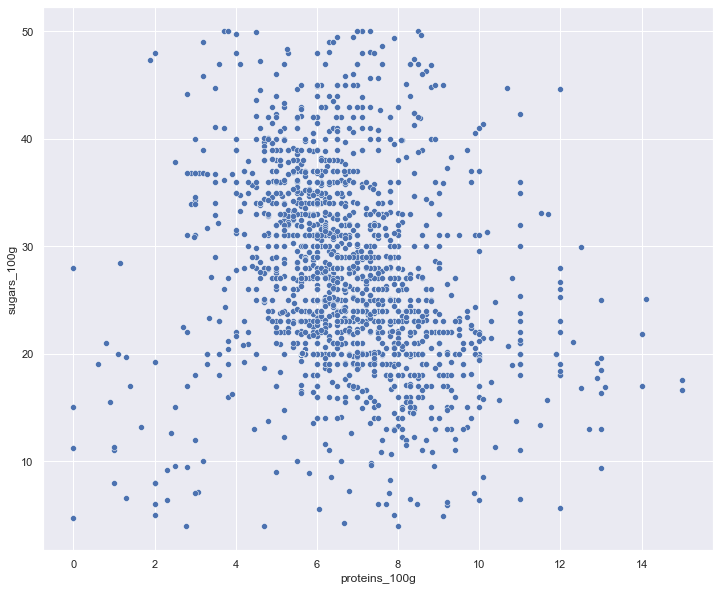

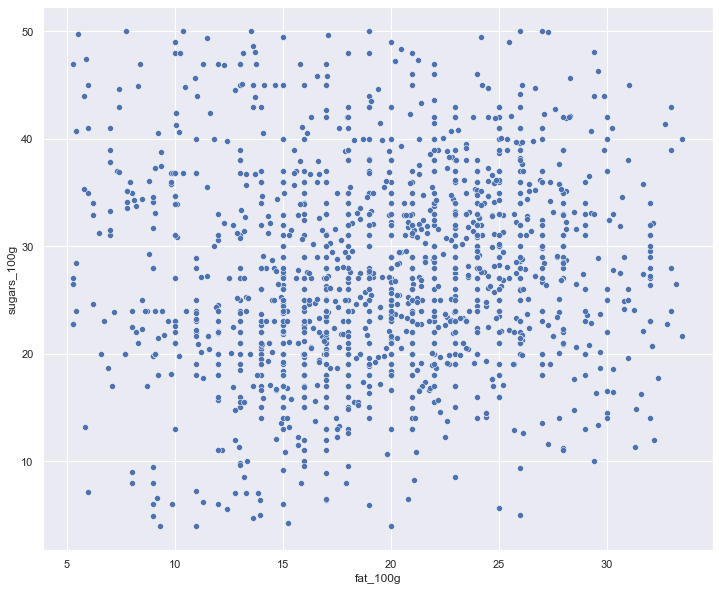

In [115]:
import itertools
for a, b in itertools.combinations(VARIABLES, 2):
    plt.figure(figsize=[12,10])
    sns.scatterplot(data=df_subset, x=a, y=b)
    plt.show()

<div style="background-color: #506AB9;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files</h2>
</div>

In [50]:
data

,code,last_modified_datetime,product_name,main_category,categories,renamed_category,image_url,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g
0,0000000005166,2019-02-12 18:38:12,cuisse de poulet direct au four curry,en:chicken-thighs,"Viandes, Volailles, Poulets, Cuisses de poulet",Meats,https://static.openfoodfacts.org/images/produc...,197.0,13.000000,4.000000,0.900000,17.0,1.100
1,0000069163036,2019-02-12 18:38:13,Cuisses de poulet,en:chicken-thighs,"Viandes, Volailles, Poulets, Cuisses de poulet",Meats,https://static.openfoodfacts.org/images/produc...,206.0,15.000000,4.200000,1.700000,16.0,1.100
2,0000130008136,2019-01-04 20:45:08,Escalope de dinde,en:turkey-cutlets,"Viandes, Volailles, Dindes, Escalopes de dinde",Meats,NaN,151.0,5.800000,1.400000,0.100000,24.0,1.400
3,00003001,2020-10-28 15:20:28,Filet de poulet extra tendre thym citron,en:chicken-breasts,"Viandes, Volailles, Poulets, Filets de poulet",Meats,https://static.openfoodfacts.org/images/produc...,108.0,1.600000,0.000000,0.700000,22.0,1.300
4,650403,2020-05-04 15:38:15,2 roast chicken legs,en:chicken-thighs,"Viandes, Volailles, Poulets, Cuisses de poulet",Meats,https://static.openfoodfacts.org/images/produc...,219.0,13.400000,3.400000,0.300000,24.4,0.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17323,9403142004683,2018-12-15 14:39:11,Chocolat noir,en:dark-chocolates,"Snacks, Snacks sucrés, Chocolats, Chocolats noirs",Chocolates,https://static.openfoodfacts.org/images/produc...,456.0,30.900000,19.500000,51.900002,5.7,0.016
17324,9421903370129,2020-02-26 20:14:48,Chocalat intense dark,en:dark-chocolates,"Snacks, Snacks sucrés, Chocolats, Chocolats noirs",Chocolates,https://static.openfoodfacts.org/images/produc...,603.0,48.000000,29.100000,24.000000,6.8,0.002
17325,9647978410441,2021-03-03 20:48:02,Noir dessert,en:dark-chocolates,"Snacks, Snacks sucrés, Chocolats, Chocolats noirs",Chocolates,https://static.openfoodfacts.org/images/produc...,544.0,35.000000,22.000000,45.599998,4.8,0.000
17326,9782035971319,2019-04-27 20:20:02,Chocolat noir masse cacao 100,en:dark-chocolates,"Snacks, Snacks sucrés, Chocolats, Chocolats noirs",Chocolates,https://static.openfoodfacts.org/images/produc...,636.0,51.299999,33.180000,12.560000,12.3,0.000


<div class="alert alert-block alert-info">
    This <b>notebook</b> is optimized to <b>be used</b> with:
    <ul style="list-style-type: square;">
        <li>Analisis bivariable</li>
        <li>Anova</li>
    </ul>
</div>